In [1]:
#import the necessary liblaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
# Tensorflow and Keras Modules
import tensorflow as tf
from keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

C:\Users\ardha\anaconda3\AnacondaNew\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#directory
BASE_DIR = 'Downloads/age_gender/UTKFace/'


image_paths = []
age_labels = []
gender_labels = []

In [3]:
#create a loop for all dataset images
for filename in (os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    #get age from 0
    age = int(temp[0])
    #get gender from 1
    gender = int(temp[1])
    #append all
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [4]:
len(image_paths)

23708

In [5]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,Downloads/age_gender/UTKFace/100_0_0_201701122...,100,0
1,Downloads/age_gender/UTKFace/100_0_0_201701122...,100,0
2,Downloads/age_gender/UTKFace/100_1_0_201701101...,100,1
3,Downloads/age_gender/UTKFace/100_1_0_201701122...,100,1
4,Downloads/age_gender/UTKFace/100_1_0_201701122...,100,1


In [6]:
# change the label of the gender
gender_dict = {0:'Male', 1:'Female'}

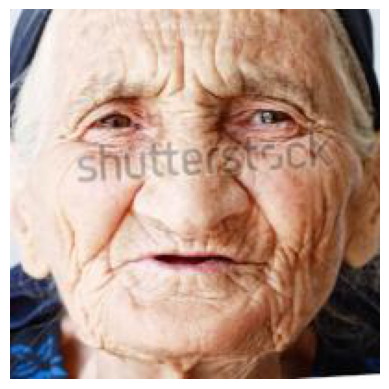

In [7]:
#import pillow lib to open and display an image from the dataset.
from PIL import Image
#open the second image
img = Image.open(df['image'][2])
plt.axis('off')
#show it
plt.imshow(img);

<AxesSubplot:xlabel='age', ylabel='Density'>

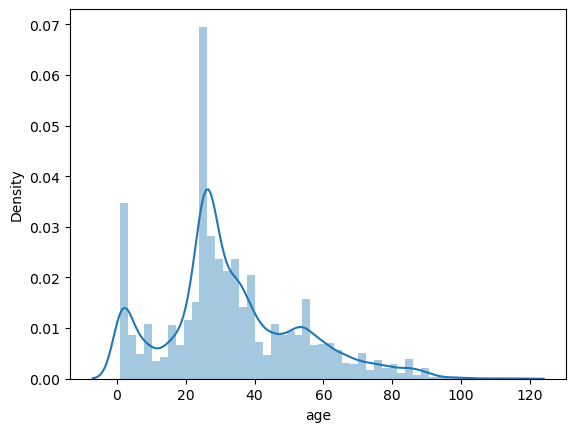

In [8]:
#check the age distribution
sns.distplot(df['age'])

<AxesSubplot:xlabel='gender', ylabel='count'>

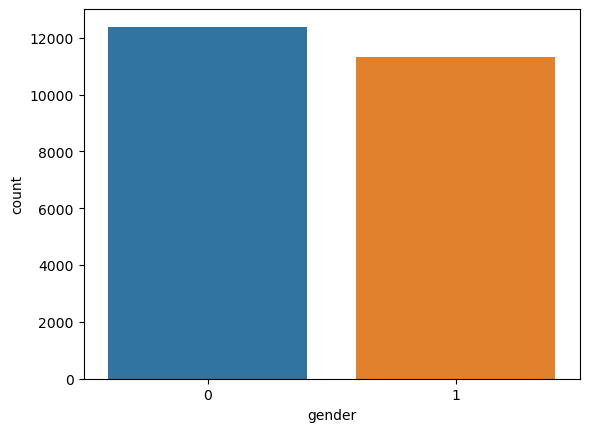

In [9]:
# Count plot of gender 
sns.countplot(df['gender'])

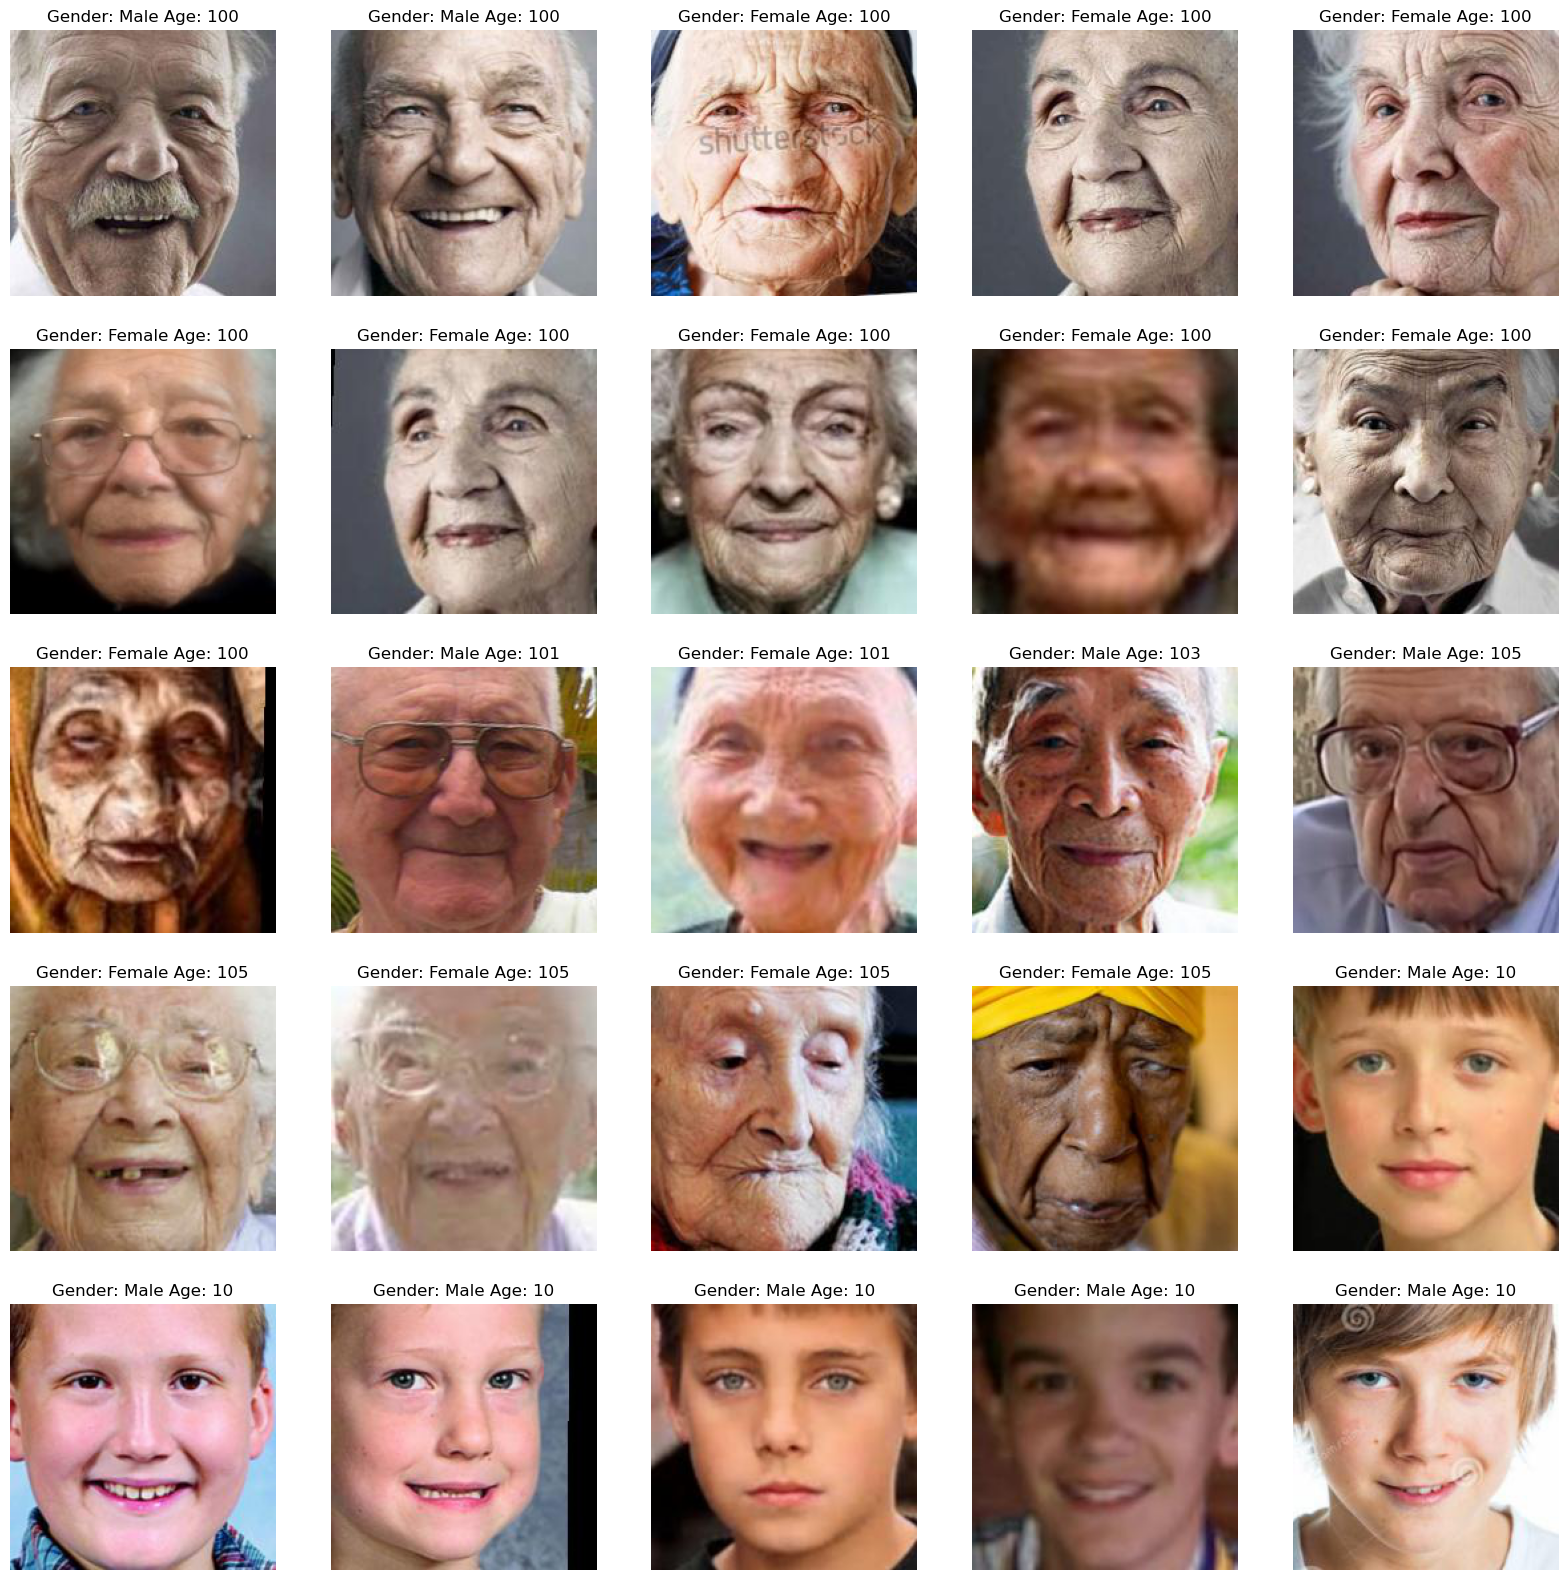

In [10]:
#show some examples
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {gender_dict[gender]} Age: {age}")
    plt.axis('off')

In [13]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import numpy as np

def extract_features(images):
    features = []
    for image in images:
        # Load the image as grayscale
        img = load_img(image, color_mode='grayscale')
        # Resize to 128x128
        img = img.resize((128, 128),Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # Reshape to add the channel dimension
    features = features.reshape(len(features), 128, 128, 1)
    return features

# Assuming df['image'] contains the file paths or image data
X = extract_features(df['image'])
X.shape


(23708, 128, 128, 1)

In [14]:
# make normalisation 0-1
X = X/255.0

In [15]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

print(y_age)

[100 100 100 ...   9   9   9]


In [24]:
#Create Model
input_shape = (128, 128, 1)
# declare input
inputs = Input((input_shape))
# Convolutional layers 1
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
# Convolutional layers 2
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
# Convolutional layers 3
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
# Convolutional layers 4
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)


flatten = Flatten() (maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mean_squared_error'], 
              optimizer='adam', 
              metrics=['accuracy', 'mean_squared_error'])

In [26]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 596s 999ms/step - age_out_mean_squared_error: 98.0237 - gender_out_accuracy: 0.7832 - loss: 98.4912 - val_age_out_mean_squared_error: 976.2413 - val_gender_out_accuracy: 0.7695 - val_loss: 976.7246
Epoch 2/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 525s 886ms/step - age_out_mean_squared_error: 80.9431 - gender_out_accuracy: 0.8049 - loss: 81.3676 - val_age_out_mean_squared_error: 786.8258 - val_gender_out_accuracy: 0.7670 - val_loss: 787.3101
Epoch 3/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 531s 896ms/step - age_out_mean_squared_error: 74.1843 - gender_out_accuracy: 0.8303 - loss: 74.5668 - val_age_out_mean_squared_error: 673.0383 - val_gender_out_accuracy: 0.7830 - val_loss: 673.5195
Epoch 4/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 603s 1s/step - age_out_mean_squared_error: 69.9928 - gender_out_accuracy: 0.8429 - loss: 70.3455 - val_age_out_mean_squared_error: 660.7061 - val_gender_out_accuracy: 0.7919 - val_loss: 661.1323
Epoch 5/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 540s 909ms/

In [27]:
model.save("age_gender.h5")

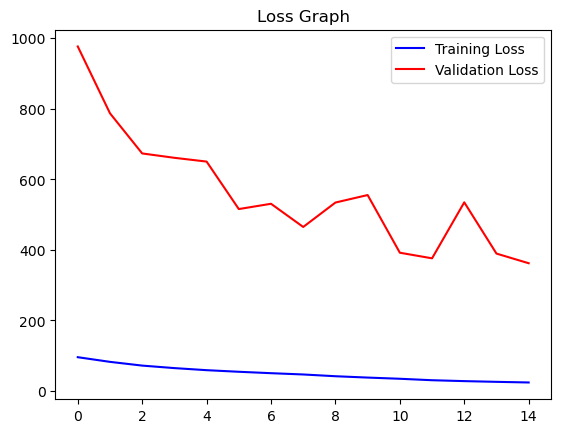

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [29]:
print(history.history.keys())

dict_keys(['age_out_mean_squared_error', 'gender_out_accuracy', 'loss', 'val_age_out_mean_squared_error', 'val_gender_out_accuracy', 'val_loss'])


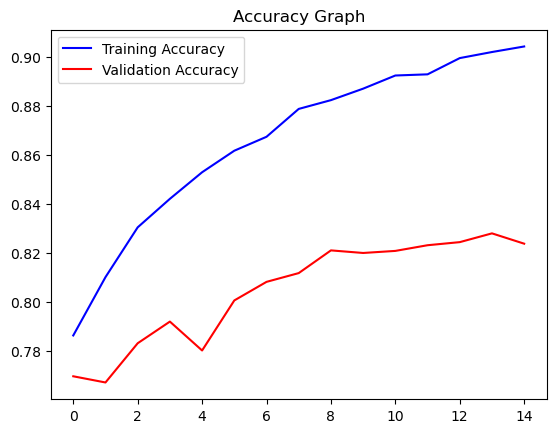

In [31]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicted Gender: Male Predicted Age: 11


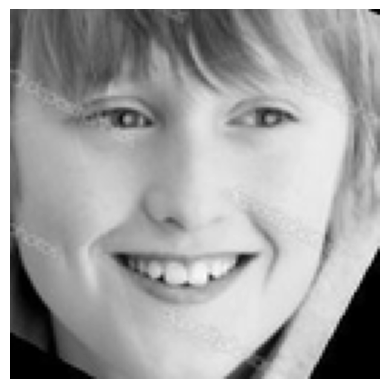

In [32]:
#random number for get image
image_index = 35
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [3]:
import cv2
from tensorflow import keras
import numpy as np

face_deection_model = cv2.CascadeClassifier(
    'Downloads/haarcascade_frontalface_default.xml')
model = keras.models.load_model("Downloads/age_gender.h5")

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_deection_model.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        print(x, y)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)

        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))

        face = np.expand_dims(face, axis=0)
        face = face / 255

        output = model.predict(face)

        age = output[0][0]
        gender = np.round(output[1][0])
        gender_type = 'male' if gender == 0 else 'female'
        text = "Age - " + str(age) + " Gender - " + gender_type 

        img = cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        print(output)

    cv2.imshow('img', img)

    k = cv2.waitKey(30) & 0xff

    if(k == 27):
        break


cap.release()

cv2.destroyAllWindows()

193 183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[array([[27.51]], dtype=float32), array([[0.09814558]], dtype=float32)]
175 176
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[array([[31.13093]], dtype=float32), array([[0.11391722]], dtype=float32)]
192 185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[array([[29.092957]], dtype=float32), array([[0.42089]], dtype=float32)]
203 183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[array([[31.068914]], dtype=float32), array([[0.928341]], dtype=float32)]
217 186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[array([[27.48734]], dtype=float32), array([[0.5102973]], dtype=float32)]
226 181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[array([[26.03112]], dtype=float32), array([[0.6090854]], dtype=float32)]
231 187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[array([[23.337402]], dtype=float32), array([[0.325589]], dtype=float32)]
232 191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[array([[25.215956]], dtype=float32), array([[0.08713003]], dtype=float32)]
235 194
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54m